# Importing libraries and dataframes

In [5]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [6]:
#Create a path and import dataframes
path = r'/Users/buketoztekin/Documents/Quantium/'
file_path = os.path.join(path, '2_Data', 'QVI_purchase_behaviour.csv')
df_purchase = pd.read_csv(file_path)
file_path2 = os.path.join(path, '2_Data', 'QVI_transaction_Data.xlsx')
df_transaction = pd.read_excel(file_path2)

# Data cleaning and wrangling

## Data cleaning and wrangling: df_purchase dataframe

In [9]:
df_purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [10]:
df_purchase.shape

(72637, 3)

In [11]:
#Check datatypes
df_purchase.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [12]:
#Convert the datatype to object for loyalty card number column
df_purchase['LYLTY_CARD_NBR'] = df_purchase['LYLTY_CARD_NBR'].astype(str)

In [13]:
#Check again
df_purchase.dtypes

LYLTY_CARD_NBR      object
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [14]:
#Count missing values
print(df_purchase.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [15]:
#Count duplicates
df_purchase.duplicated().sum()

0

In [16]:
#Check Unique Values for LIFESTAGE and PREMIUM_CUSTOMER
print(df_purchase['LIFESTAGE'].unique())
print(df_purchase['PREMIUM_CUSTOMER'].unique())

['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
['Premium' 'Mainstream' 'Budget']


## Data cleaning and wrangling: df_transaction dataframe

In [18]:
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [19]:
df_transaction.shape

(264836, 8)

In [20]:
df_transaction.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [21]:
# Convert Excel serial number to datetime
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'], origin='1899-12-30', unit='D')

# Check if it worked
print(df_transaction[['DATE']].head())

        DATE
0 2018-10-17
1 2019-05-14
2 2019-05-20
3 2018-08-17
4 2018-08-18


In [22]:
#Convert Loyalty Card Number to string
df_transaction['LYLTY_CARD_NBR'] = df_transaction['LYLTY_CARD_NBR'].astype(str)
df_transaction['TXN_ID'] = df_transaction['TXN_ID'].astype(str)

In [23]:
#Check for missing values
print(df_transaction.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [24]:
#Check for duplicates
df_transaction.duplicated().sum()

1

In [25]:
#Drop the duplicates
df_transaction = df_transaction.drop_duplicates()
df_transaction.duplicated().sum()

0

In [26]:
#Check numerical values descriptives
print(df_transaction['PROD_QTY'].describe())

count    264835.000000
mean          1.907308
std           0.643655
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64


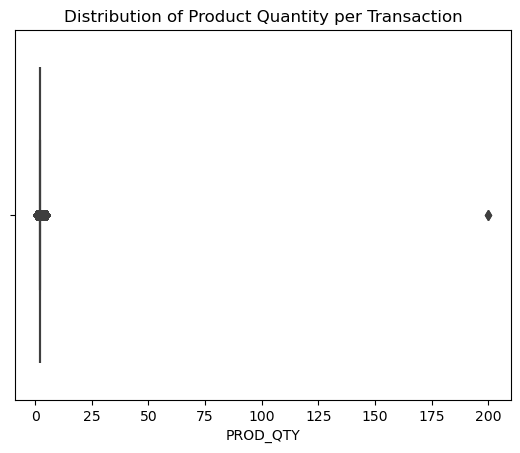

In [27]:
# Boxplot to detect product quantity
sns.boxplot(x=df_transaction['PROD_QTY'])
plt.title("Distribution of Product Quantity per Transaction")

# Show the plot
plt.show()

##### # Since the box plot reveals extreme values reaching 200, I will investigate how many values exceed 10. This will help determine whether these high values are legitimate data points or potential errors. By creating a separate dataframe for values above 10, I can analyze them further and decide whether they should be kept, transformed, or removed based on their context and impact on the dataset.

In [29]:
#Create a bulk_purchase dataframe with purchase quantity above 10
bulk_purchase = df_transaction[df_transaction['PROD_QTY'] > 10] 
print(bulk_purchase)

            DATE  STORE_NBR LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226         226000  226201         4   
69763 2019-05-20        226         226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


##### These two extreme values (200 units) appear to be significant outliers in the dataset. Both transactions involve the same store (226), the same product (Dorito Corn Chip Supreme 380g), and the same total sales amount (650.0). Given that they are identical in multiple attributes, these could indicate a bulk purchase, a data entry error, or a special transaction (e.g., a promotional or wholesale purchase). Further investigation may be needed to confirm whether these values should be retained or adjusted, depending on the business context.

In [31]:
#Check unique product names
print(df_transaction['PROD_NAME'].unique())

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

In [32]:
df_transaction['PROD_NAME'].nunique()

114

In [75]:
# Remove non-chip products (Salsa & Dips)
df_transaction = df_transaction[~df_transaction['PROD_NAME'].str.contains('salsa|dip', case=False, regex=True)]

# Check unique product names again to confirm removal
print(df_transaction['PROD_NAME'].unique())

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Thins Chips         Originl saltd 175g'
 'Red Rock De

In [77]:
df_transaction['PROD_NAME'].nunique()

104

##### Ten non-chips products (such as salsa and dip) have been removed from the dataset. 

## Merging two dataframes

In [82]:
df_merged = df_purchase.merge(df_transaction, on='LYLTY_CARD_NBR', how='inner')

In [84]:
df_merged.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [86]:
#Count missing values
print(df_merged.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64


In [88]:
df_merged.duplicated().sum()

0

In [90]:
df_merged.shape

(245303, 10)

## Column Derivations

### Derive PACK_SIZE column from PROD_NAME


In [92]:
import re

# Function to extract pack size
def extract_pack_size(prod_name):
    match = re.search(r'(\d{2,3})[gG]', prod_name)  # Looks for a number followed by 'g'
    return int(match.group(1)) if match else None  # Convert to integer

# Apply function to create a new 'PACK_SIZE' column
df_merged['PACK_SIZE'] = df_merged['PROD_NAME'].apply(extract_pack_size)

# Check if it worked
print(df_merged[['PROD_NAME', 'PACK_SIZE']].head())

                                PROD_NAME  PACK_SIZE
0  Natural Chip        Compny SeaSalt175g        175
1   Red Rock Deli Chikn&Garlic Aioli 150g        150
2   Grain Waves Sour    Cream&Chives 210G        210
3  Natural ChipCo      Hony Soy Chckn175g        175
4          WW Original Stacked Chips 160g        160


In [94]:
df_merged['PACK_SIZE'].value_counts().sort_index()

PACK_SIZE
70      1507
90      3008
110    22387
125     1454
134    25102
135     3257
150    38765
160     2970
165    15297
170    19983
175    66389
180     1468
190     2995
200     4473
210     6272
220     1564
250     3169
270     6285
330    12540
380     6418
Name: count, dtype: int64

### Derive BRAND column from PROD_NAME

In [96]:
# Extract first word as brand name
df_merged['BRAND'] = df_merged['PROD_NAME'].apply(lambda x: x.split()[0])

# Check results
print(df_merged[['PROD_NAME', 'BRAND']].head(50))

                                   PROD_NAME       BRAND
0     Natural Chip        Compny SeaSalt175g     Natural
1      Red Rock Deli Chikn&Garlic Aioli 150g         Red
2      Grain Waves Sour    Cream&Chives 210G       Grain
3     Natural ChipCo      Hony Soy Chckn175g     Natural
4             WW Original Stacked Chips 160g          WW
5                         Cheetos Puffs 165g     Cheetos
6   Infuzions SourCream&Herbs Veg Strws 110g   Infuzions
7        RRD SR Slow Rst     Pork Belly 150g         RRD
8           Doritos Cheese      Supreme 330g     Doritos
9                   Doritos Mexicana    170g     Doritos
10     GrnWves Plus Btroot & Chilli Jam 180g     GrnWves
11  Infuzions SourCream&Herbs Veg Strws 110g   Infuzions
12   Smiths Crinkle Cut  Chips Barbecue 170g      Smiths
13          Doritos Cheese      Supreme 330g     Doritos
14  Kettle Sensations   Camembert & Fig 150g      Kettle
15   Doritos Corn Chip Southern Chicken 150g     Doritos
16                  CCs Tasty C

In [98]:
# Get unique brand names in df_merged
unique_brands = df_merged['BRAND'].unique()

# Display the unique brand names
print(unique_brands)

['Natural' 'Red' 'Grain' 'WW' 'Cheetos' 'Infuzions' 'RRD' 'Doritos'
 'GrnWves' 'Smiths' 'Kettle' 'CCs' 'Tostitos' 'Cobs' 'Burger' 'Woolworths'
 'Thins' 'Tyrrells' 'Smith' 'Cheezels' 'Twisties' 'Sunbites' 'Snbts'
 'Pringles' 'French' 'Infzns' 'Dorito' 'NCC']


In [100]:
# Standardize brand names
df_merged['BRAND'] = df_merged['BRAND'].replace({
    'Infzns': 'Infuzions',
    'RRD': 'Red Rock Deli',
    'Red': 'Red Rock Deli',
    'WW': 'Woolworths',
    'GrnWves': 'Grain Waves',
    'Grain': 'Grain Waves',
    'Smith': 'Smiths',
    'Dorito': 'Doritos',
    'NCC': 'Natural Chip Company',
    'Natural': 'Natural Chip Company',
    'Natural Chip Co': 'Natural Chip Company',
    'Snbts': 'Sunbites',
    'French': 'French Fries',
})

# Check unique brands after standardization
print(df_merged['BRAND'].unique())

['Natural Chip Company' 'Red Rock Deli' 'Grain Waves' 'Woolworths'
 'Cheetos' 'Infuzions' 'Doritos' 'Smiths' 'Kettle' 'CCs' 'Tostitos' 'Cobs'
 'Burger' 'Thins' 'Tyrrells' 'Cheezels' 'Twisties' 'Sunbites' 'Pringles'
 'French Fries']


### Creating a new dataframe without the 2 outliers / bulk purchases

##### After deriving new columns and standardizing brand names, I will create a new dataframe that excludes bulk purchases. Since the data analysis focuses on typical consumer behavior, removing these bulk transactions ensures that the insights are not skewed by unusually large purchases that do not reflect standard shopping patterns.









In [102]:
df_merged['BULK_PURCHASE'] = df_merged['PROD_QTY'].apply(lambda x: 'YES' if x > 10 else 'NO')

In [104]:
df_bulk = df_merged[df_merged['BULK_PURCHASE'] == 'YES']
df_normal = df_merged[df_merged['BULK_PURCHASE'] == 'NO']

In [106]:
df_normal.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,BULK_PURCHASE
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Company,NO
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,Red Rock Deli,NO
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,Grain Waves,NO
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,Natural Chip Company,NO
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,Woolworths,NO


In [108]:
df_bulk.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,BULK_PURCHASE
205303,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos,YES
205304,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos,YES


# Exploratory analysis (EDA)

In [110]:
#Check number of unique customers, stores, products, customer segments, and premium segments
print("Unique Customers:", df_normal['LYLTY_CARD_NBR'].nunique())
print("Unique Stores:", df_normal['STORE_NBR'].nunique())
print("Unique Products:", df_normal['PROD_NAME'].nunique())
print("Customer Segments:", df_normal['LIFESTAGE'].unique())
print("Premium Segments:", df_normal['PREMIUM_CUSTOMER'].unique())

Unique Customers: 71185
Unique Stores: 271
Unique Products: 104
Customer Segments: ['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
Premium Segments: ['Premium' 'Mainstream' 'Budget']


In [112]:
# Calculate total revenue
total_revenue = df_normal['TOT_SALES'].sum()
print(f"Total Revenue: {total_revenue}")

Total Revenue: 1798125.7000000002


In [114]:
# Calculate yearly revenue
yearly_revenue = df_normal.groupby(df_normal['DATE'].dt.year)['TOT_SALES'].sum()
print("Yearly Revenue:\n", yearly_revenue)

Yearly Revenue:
 DATE
2018    907911.05
2019    890214.65
Name: TOT_SALES, dtype: float64


In [116]:
#Count of total transactions
print(f"Total Transactions: {df_normal['TXN_ID'].nunique()}")

Total Transactions: 243838


In [118]:
print(f"Average Spend per Transaction: ${df_normal['TOT_SALES'].mean():.2f}")

Average Spend per Transaction: $7.33


In [120]:
df_normal[['PROD_QTY', 'TOT_SALES']].describe()

,PROD_QTY,TOT_SALES
count,245301.000000,245301.000000
mean,1.906584,7.330283
std,0.342364,2.474137
min,1.000000,1.700000
25%,2.000000,5.800000
50%,2.000000,7.400000
75%,2.000000,8.800000
max,5.000000,29.500000


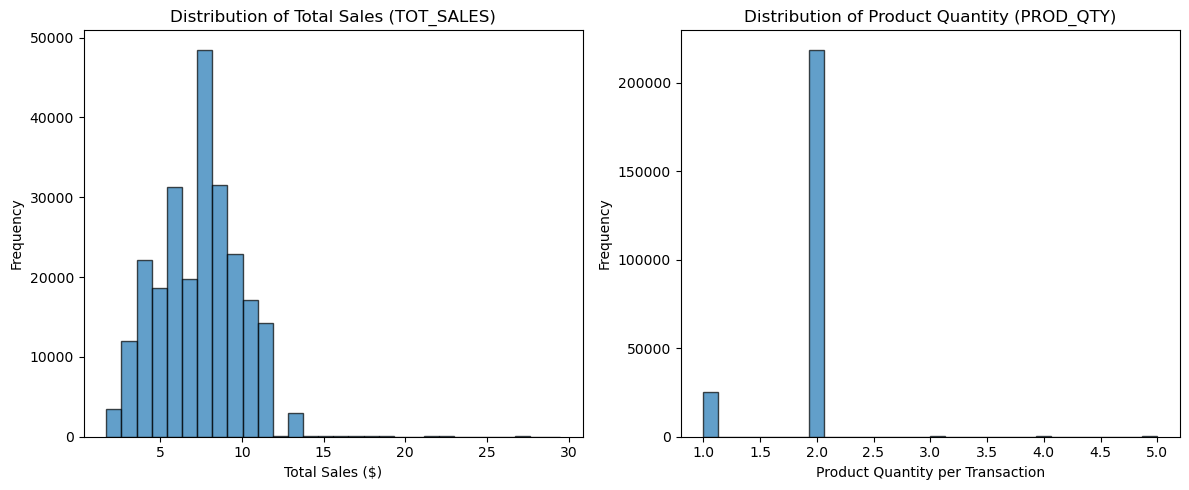

In [122]:
# Create histograms for TOT_SALES and PROD_QTY
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for TOT_SALES
axes[0].hist(df_normal['TOT_SALES'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Total Sales (TOT_SALES)')
axes[0].set_xlabel('Total Sales ($)')
axes[0].set_ylabel('Frequency')

# Histogram for PROD_QTY
axes[1].hist(df_normal['PROD_QTY'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribution of Product Quantity (PROD_QTY)')
axes[1].set_xlabel('Product Quantity per Transaction')
axes[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

#### Observations from the Histograms:
1. Distribution of Total Sales (Left Histogram)
The total sales per transaction mostly fall within the range of $3 to $15, with a peak around $5 to $10.
There are very few transactions above $20, suggesting that most purchases are of lower to mid-value items.
The distribution appears slightly right-skewed, indicating a small number of higher-value transactions.

2. Distribution of Product Quantity per Transaction (Right Histogram)
Most transactions involve purchasing 2 units of a product.
There are very few transactions with 1 unit or more than 2 units, suggesting that buying in pairs is a common trend.
Almost no transactions exceed 5 units, reinforcing that bulk purchases are rare in this dataset.


Key Takeaways
Customers generally spend between $3 and $15 per transaction.
Most transactions involve purchasing exactly 2 units, which might indicate multi-buy promotions or consumer habits favoring purchasing in pairs.

## Customer Profiles: Count & Spending by Lifestage and Premium Status

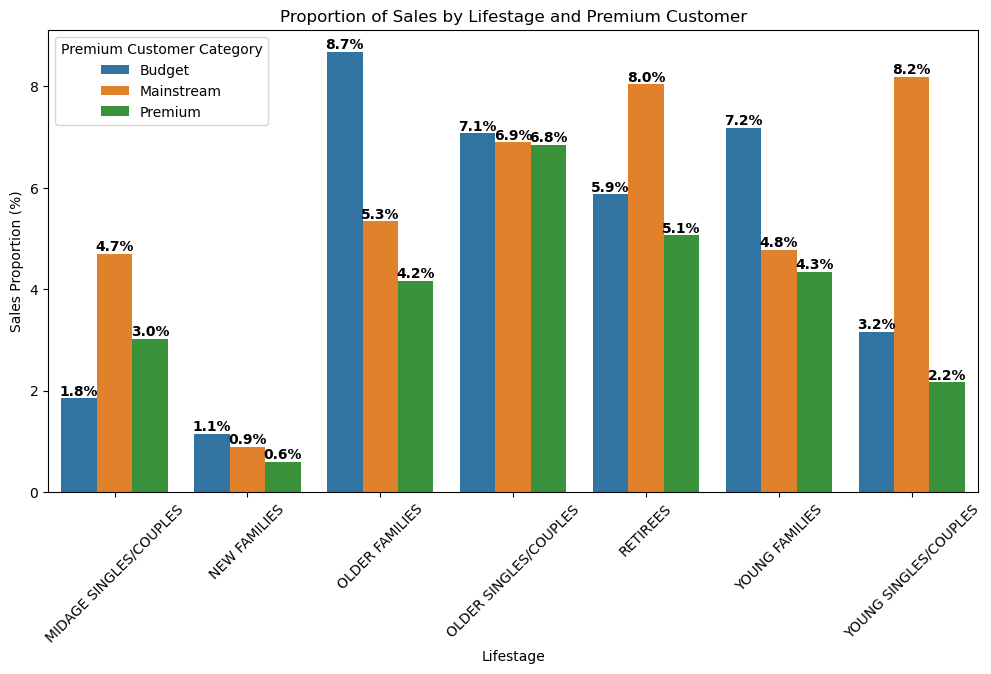

In [164]:
# Compute total sales by Lifestage and Premium Customer
sales = df_normal.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Compute proportion of sales
sales['SALES_PROPORTION'] = sales['TOT_SALES'] / sales['TOT_SALES'].sum() * 100

# Create bar plot to visualize proportion of sales
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sales, x='LIFESTAGE', y='SALES_PROPORTION', hue='PREMIUM_CUSTOMER')

# Add proportion labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Customize plot
plt.title('Proportion of Sales by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Sales Proportion (%)')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer Category')

# Show plot
plt.show()

##### Highest spenders are Budget OLDER FAMILIES, Mainstream RETIREES and Mainstream YOUNG SINGLE/COUPLES.

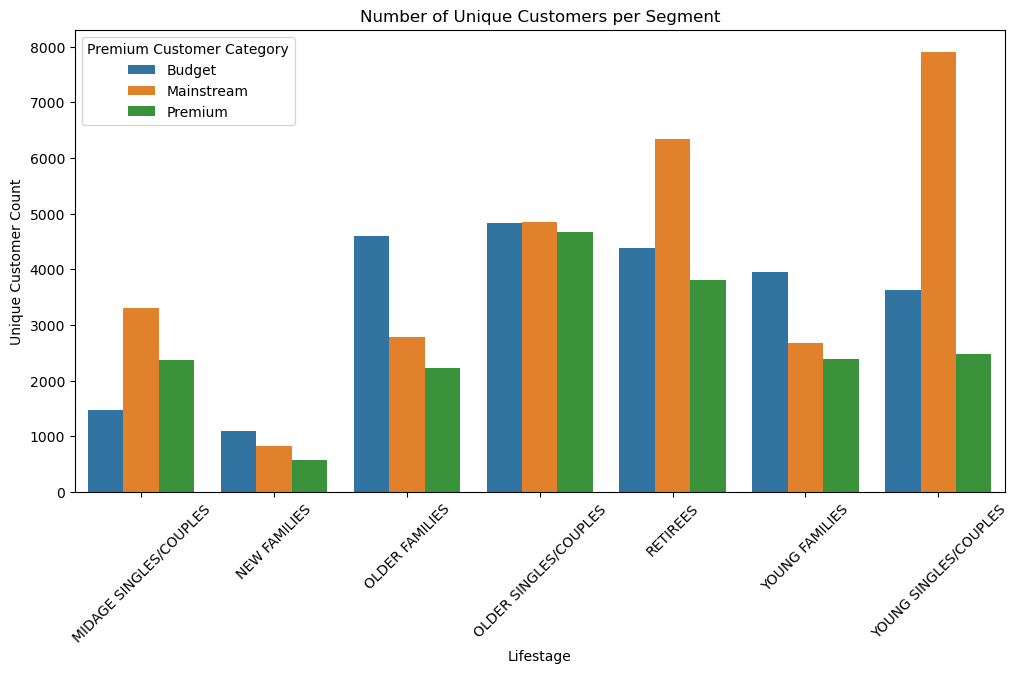

In [170]:
# Count unique customers per segment
customer_counts = df_normal.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Rename columns for clarity
customer_counts.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'CUSTOMER_COUNT']

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_counts, x='LIFESTAGE', y='CUSTOMER_COUNT', hue='PREMIUM_CUSTOMER')

# Customize plot
plt.title('Number of Unique Customers per Segment')
plt.xlabel('Lifestage')
plt.ylabel('Unique Customer Count')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer Category')

# Show plot
plt.show()

##### The high sales in Mainstream Young Singles/Couples and Retirees may be primarily driven by the large number of customers in these segments. However, despite having fewer customers, the Budget Older Families segment generates exceptionally high sales, suggesting that factors beyond customer count—such as larger purchases per transaction or higher purchase frequency—may be contributing to their strong performance.

/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_15498/3166990707.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_units = df_normal.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(


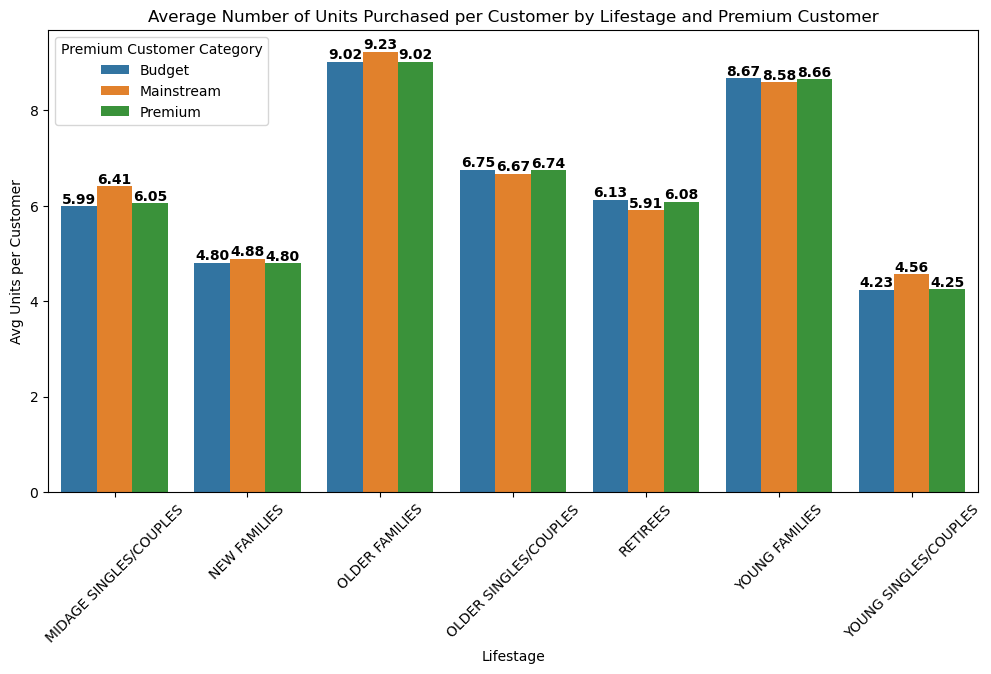

In [180]:
# Compute average number of units per customer by Lifestage and Premium Customer
avg_units = df_normal.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(
    lambda x: x['PROD_QTY'].sum() / x['LYLTY_CARD_NBR'].nunique()
).reset_index(name='AVG_UNITS_PER_CUSTOMER')

# Create bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=avg_units, x='LIFESTAGE', y='AVG_UNITS_PER_CUSTOMER', hue='PREMIUM_CUSTOMER', dodge=True)

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# Customize plot
plt.title('Average Number of Units Purchased per Customer by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Avg Units per Customer')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer Category')

# Show plot
plt.show()

##### Older Families and Young Families tend to purchase a higher number of chips per customer, suggesting that these segments may have a greater household demand for chips, possibly due to larger family sizes or more frequent snacking habits.

/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_15498/3840270545.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_price = df_normal.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(


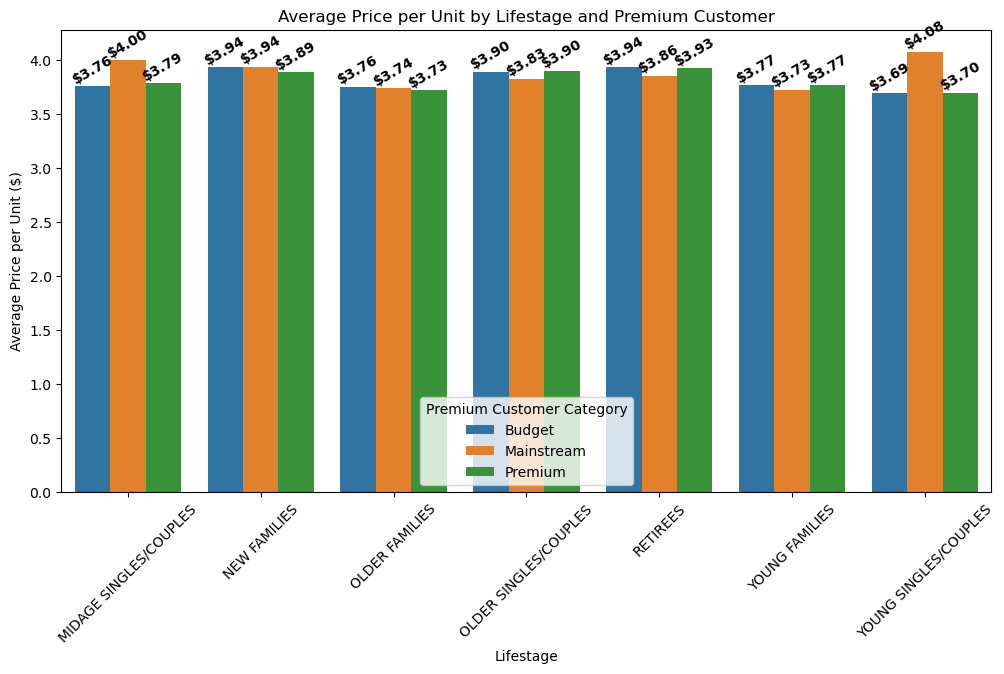

In [211]:
# Compute average price per unit by Lifestage and Premium Customer
avg_price = df_normal.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(
    lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum()
).reset_index(name='AVG_PRICE_PER_UNIT')

# Create bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=avg_price, x='LIFESTAGE', y='AVG_PRICE_PER_UNIT', hue='PREMIUM_CUSTOMER', dodge=True)

# Add price labels on top of bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', weight='bold', rotation=30)

# Customize plot
plt.title('Average Price per Unit by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Average Price per Unit ($)')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer Category')

# Show plot
plt.show()

##### Mainstream Mid-age and Mainstream Young Singles/Couples tend to spend more per packet of chips compared to their Budget and Premium counterparts. This could be because Premium shoppers may prioritize healthier snack options, and when they do purchase chips, it is likely for entertainment or social occasions rather than personal consumption.

##### Let's compare the average price per unit that different customer segments pay for chips.


##### Two Groups Compared:

##### Mainstream Young Singles/Couples & Mid-age Singles/Couples
##### → Do they pay more per chip packet?

##### Budget & Premium Young Singles/Couples & Mid-age Singles/Couples
##### → Do they pay less per chip packet?

In [186]:
from scipy.stats import ttest_ind

# Create a new column for price per unit
df_normal['PRICE_PER_UNIT'] = df_normal['TOT_SALES'] / df_normal['PROD_QTY']

# Define the two groups
mainstream_group = df_normal[(df_normal['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & 
                             (df_normal['PREMIUM_CUSTOMER'] == "Mainstream")]['PRICE_PER_UNIT']

non_mainstream_group = df_normal[(df_normal['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])) & 
                                 (df_normal['PREMIUM_CUSTOMER'] != "Mainstream")]['PRICE_PER_UNIT']

# Perform independent t-test (one-tailed, testing if mainstream spends more per unit)
t_stat, p_value = ttest_ind(mainstream_group, non_mainstream_group, alternative='greater')

# Display results
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


T-statistic: 37.5161, P-value: 0.0000


/var/folders/3_/dyc73j694fb41h6xln2l5_rc0000gn/T/ipykernel_15498/2167872612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal['PRICE_PER_UNIT'] = df_normal['TOT_SALES'] / df_normal['PROD_QTY']


##### Since the p-value is nearly 0, we can confidently say that Mainstream Mid-age & Young Singles/Couples pay significantly more per chip packet than Budget & Premium customers in the same LIFESTAGE.
##### This supports the idea that Mainstream customers in these life stages are less price-sensitive or prefer higher-end chip brands.

### What brands do Mainstream Young Singles Couples and mainstream Mid-age Singles/Couples prefer?

#### Mainstream Young Singles Couples' Brand Affinities

In [197]:
# Step 1: Filter the segment of interest (Mainstream Young Singles/Couples)
segment1 = df_normal[(df_normal['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & 
                     (df_normal['PREMIUM_CUSTOMER'] == "Mainstream")]

# Step 2: Filter the rest of the population (everyone else)
other = df_normal[~((df_normal['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & 
                     (df_normal['PREMIUM_CUSTOMER'] == "Mainstream"))]

# Step 3: Compute total quantity of chips bought by each group
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

# Step 4: Compute brand proportions for the target segment
quantity_segment1_by_brand = (segment1.groupby('BRAND')['PROD_QTY'].sum() / quantity_segment1).reset_index()
quantity_segment1_by_brand.columns = ['BRAND', 'targetSegment']

# Step 5: Compute brand proportions for the rest of the population
quantity_other_by_brand = (other.groupby('BRAND')['PROD_QTY'].sum() / quantity_other).reset_index()
quantity_other_by_brand.columns = ['BRAND', 'other']

# Step 6: Merge both dataframes to compare proportions
brand_proportions = quantity_segment1_by_brand.merge(quantity_other_by_brand, on='BRAND')

# Step 7: Compute brand affinity (how much more likely the segment prefers a brand)
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']

# Step 8: Sort brands by highest affinity
brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

# Display results
print(brand_proportions.head(21))  # Show top 10 brands with the highest affinity


                   BRAND  targetSegment     other  affinityToBrand
18              Tyrrells       0.031666  0.025846         1.225189
17              Twisties       0.046350  0.038103         1.216434
5                Doritos       0.123203  0.101679         1.211678
9                 Kettle       0.198698  0.166544         1.193066
16              Tostitos       0.045574  0.038205         1.192883
11              Pringles       0.119850  0.101237         1.183862
4                   Cobs       0.044798  0.039282         1.140418
8              Infuzions       0.064912  0.057406         1.130752
15                 Thins       0.060590  0.057327         1.056916
7            Grain Waves       0.032830  0.031375         1.046391
3               Cheezels       0.018036  0.018758         0.961472
13                Smiths       0.093115  0.119347         0.780210
6           French Fries       0.003962  0.005793         0.683947
2                Cheetos       0.008062  0.012139         0.66

##### Brand affinity:  If a brand has an affinity >1, this segment prefers it more than the general population.  

##### Brand affinity analysis reveals that Mainstream Young Singles/Couples have a stronger preference for Tyrells chips, making them more likely to purchase this brand compared to other customer segments. Conversely, they are less likely to buy Burger Rings, indicating a lower affinity for this product within this group.

#### Mainstream Midage Single/Couples Brand Affinities

In [201]:
# Step 1: Filter the segment of interest (Mainstream Young Singles/Couples)
segment1 = df_normal[(df_normal['LIFESTAGE'] == "MIDAGE SINGLES/COUPLES") & 
                     (df_normal['PREMIUM_CUSTOMER'] == "Mainstream")]

# Step 2: Filter the rest of the population (everyone else)
other = df_normal[~((df_normal['LIFESTAGE'] == "MIDAGE SINGLES/COUPLES") & 
                     (df_normal['PREMIUM_CUSTOMER'] == "Mainstream"))]

# Step 3: Compute total quantity of chips bought by each group
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

# Step 4: Compute brand proportions for the target segment
quantity_segment1_by_brand = (segment1.groupby('BRAND')['PROD_QTY'].sum() / quantity_segment1).reset_index()
quantity_segment1_by_brand.columns = ['BRAND', 'targetSegment']

# Step 5: Compute brand proportions for the rest of the population
quantity_other_by_brand = (other.groupby('BRAND')['PROD_QTY'].sum() / quantity_other).reset_index()
quantity_other_by_brand.columns = ['BRAND', 'other']

# Step 6: Merge both dataframes to compare proportions
brand_proportions = quantity_segment1_by_brand.merge(quantity_other_by_brand, on='BRAND')

# Step 7: Compute brand affinity (how much more likely the segment prefers a brand)
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']

# Step 8: Sort brands by highest affinity
brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

# Display results
print(brand_proportions.head(21))  # Show top 10 brands with the highest affinity

                   BRAND  targetSegment     other  affinityToBrand
9                 Kettle       0.193391  0.167873         1.152009
17              Twisties       0.044123  0.038485         1.146487
4                   Cobs       0.045022  0.039457         1.141045
16              Tostitos       0.043744  0.038539         1.135061
8              Infuzions       0.062018  0.057795         1.073070
3               Cheezels       0.019931  0.018645         1.068990
5                Doritos       0.109359  0.103056         1.061168
18              Tyrrells       0.027032  0.026261         1.029384
7            Grain Waves       0.032098  0.031458         1.020336
11              Pringles       0.104625  0.102581         1.019928
15                 Thins       0.057426  0.057586         0.997207
13                Smiths       0.111395  0.117602         0.947218
2                Cheetos       0.010178  0.011902         0.855191
12         Red Rock Deli       0.054490  0.066597         0.81

##### Brand affinity analysis reveals that Midage Singles/Couples have a stronger preference for Kettle chips, making them 15% more likely to purchase this brand compared to other customer segments. Conversely, they are 50% less likely to buy Sunbites.